In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from hashlib import md5
import zipfile
import pandas
import numpy as np
import somoclu
from matchbox.util.loaders import load_datasets
from matchbox.tests.som import som_test

from results import load_results, general_stats, pretty_highest_ind, most_frequent_highest, parse_fields
import plot

plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'text.usetex': True,
    'lines.markersize': 5,
    'lines.linewidth': 1,
    'errorbar.capsize': 5
})

In [2]:
_, data_knn, _, edd_knn = load_results(['dc2_20220321_knn'], return_inds=True)
_, data_som, _, edd_som = load_results(['dc2_20220331_som'], return_inds=True)

In [3]:
stats_knn = general_stats(None, data_knn, alpha=0.05)
print(stats_knn.to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} &   Method &  Lambda &  Gamma &    Time Q1 &     Time Q3 &  Match Q1 &  Match Q3 &  Card Q1 &  Card Q3 &  Precision &   Overhead &     N &  Timeouts \\
\midrule
0 &  FindQ 0 &     0.1 &   0.95 &   1.312961 &   21.863134 &  0.800000 &    0.9000 &      6.0 &     16.0 &   0.678133 &  16.477858 &  3521 &  0.001418 \\
1 &  FindQ 1 &     0.1 &   0.95 &  16.051058 &  101.431657 &  0.833333 &    0.9375 &     22.0 &     64.0 &   0.275323 &  25.277367 &  3500 &  0.005682 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_252809/630929082.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_knn.to_latex())


In [4]:
stats_som = general_stats(None, data_som, alpha=0.05)
print(stats_som.to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} &   Method &  Lambda &  Gamma &     Time Q1 &      Time Q3 &  Match Q1 &  Match Q3 &  Card Q1 &  Card Q3 &  Precision &   Overhead &     N &  Timeouts \\
\midrule
0 &  FindQ 0 &     0.1 &   0.95 &   11.270419 &   209.234272 &  0.800000 &  0.900000 &      5.0 &     13.0 &   0.694868 &  13.132332 &  1091 &  0.016231 \\
1 &  FindQ 1 &     0.1 &   0.95 &  192.407760 &  1232.191503 &  0.833333 &  0.940257 &     14.0 &     46.0 &   0.225148 &  26.399671 &  1022 &  0.073436 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_252809/247702323.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_som.to_latex())


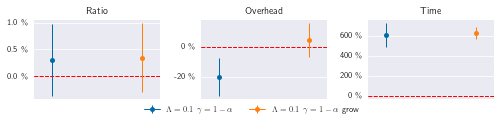

In [5]:
figsize = plt.rcParams['figure.figsize']

fig, axes = plt.subplots(ncols=3, nrows=1, sharex=True, figsize=(figsize[0], figsize[1]/3))
for i, key in enumerate(data_som.keys()):
    max_col = next(filter(lambda c: c.startswith('max_'), data_som[key].columns))    
    
    somd = data_som[key]
    knnd = data_knn[key]
    
    sommask = (somd['bootstrap_alpha'] == 0.05) & (somd['exact'] > 0) & (~somd['timeout'])
    knnmask = (knnd['bootstrap_alpha'] == 0.05) & (knnd['exact'] > 0) & (~knnd['timeout'])
    
    somd = somd[sommask]
    knnd = knnd[knnmask]
    
    plot.plot_confidence(axes[0], i, somd[max_col]/somd['exact'], knnd[max_col]/knnd['exact'], marker='o', label=plot.readable_key(*key))
    plot.plot_confidence(axes[1], i, somd['tests']/somd['unique_ind'], knnd['tests']/knnd['unique_ind'], marker='o', label=plot.readable_key(*key))
    plot.plot_confidence(axes[2], i, somd['time'], knnd['time'], marker='o', label=plot.readable_key(*key))   
    
axes[0] .yaxis.set_major_formatter('{x:.1f} \\%')

axes[0].set_title('Ratio')
axes[1].set_title('Overhead')
axes[2].set_title('Time')
axes[0].set_xlim(-0.2, 1.2)

axes[1].legend(loc='upper center', bbox_to_anchor=(0.4, 0.0), ncol=2)
fig.subplots_adjust(left=0, wspace=0.32, right=1)
fig.savefig('/home/aalvarez/Plots/presq_som.eps', bbox_inches='tight')
plt.show()

## Maximal EDD found

In [6]:
key1 = (0.1, 1., 0)

pretty_highest_ind(edd_knn[key1])

,euclid_cosmos_DC2_S2_v2.1_calib.fits,euclid_cosmos_DC2_S2_v2.1_valid.fits
0,CLASS_STAR_DETECT,CLASS_STAR_DETECT
1,ELLIPTICITY_DETECT,ELLIPTICITY_DETECT
2,FLUXERR_G_1,FLUXERR_G_1
3,FLUXERR_I_1,FLUXERR_I_1
4,FLUXERR_R_1,FLUXERR_R_1
5,FLUXERR_VIS,FLUXERR_VIS
6,FLUXERR_Y_1,FLUXERR_Y_1
7,FLUXERR_Z_1,FLUXERR_Z_1
8,FLUX_G_1,FLUX_G_1
9,FLUX_H_1,FLUX_H_1


In [7]:
pretty_highest_ind(edd_som[key1])

,euclid_cosmos_DC2_S2_v2.1_calib.fits,euclid_cosmos_DC2_S2_v2.1_valid.fits
0,CLASS_STAR_DETECT,CLASS_STAR_DETECT
1,ELLIPTICITY_DETECT,ELLIPTICITY_DETECT
2,FLUXERR_G_1,FLUXERR_G_1
3,FLUXERR_I_1,FLUXERR_I_1
4,FLUXERR_R_1,FLUXERR_R_1
5,FLUXERR_VIS,FLUXERR_VIS
6,FLUXERR_Z_1,FLUXERR_Z_1
7,FLUX_G_1,FLUX_G_1
8,FLUX_H_1,FLUX_H_1
9,FLUX_I_1,FLUX_I_1


In [8]:
key2 = (0.1, 1., 1)

pretty_highest_ind(edd_knn[key2])

,euclid_cosmos_DC2_S2_v2.1_calib.fits,euclid_cosmos_DC2_S2_v2.1_valid.fits
0,CLASS_STAR_DETECT,CLASS_STAR_DETECT
1,ELLIPTICITY_DETECT,ELLIPTICITY_DETECT
2,FLUXERR_G_1,FLUXERR_G_1
3,FLUXERR_I_1,FLUXERR_I_1
4,FLUXERR_R_1,FLUXERR_R_1
5,FLUXERR_VIS,FLUXERR_VIS
6,FLUXERR_Y_1,FLUXERR_Y_1
7,FLUXERR_Z_1,FLUXERR_Z_1
8,FLUX_G_1,FLUX_G_1
9,FLUX_H_1,FLUX_H_1


In [9]:
pretty_highest_ind(edd_som[key2])

,euclid_cosmos_DC2_S2_v2.1_calib.fits,euclid_cosmos_DC2_S2_v2.1_valid.fits
0,CLASS_STAR_DETECT,CLASS_STAR_DETECT
1,ELLIPTICITY_DETECT,ELLIPTICITY_DETECT
2,FLUXERR_G_1,FLUXERR_G_1
3,FLUXERR_I_1,FLUXERR_I_1
4,FLUXERR_R_1,FLUXERR_R_1
5,FLUXERR_VIS,FLUXERR_VIS
6,FLUXERR_Z_1,FLUXERR_Z_1
7,FLUX_G_1,FLUX_G_1
8,FLUX_H_1,FLUX_H_1
9,FLUX_I_1,FLUX_I_1


# Let's get a SOM

In [2]:
calib = load_datasets(['/home/aalvarez/Work/Projects/MatchBox/data/dc2/euclid_cosmos_DC2_S2_v2.1_calib.fits'])[0][1]
valid = load_datasets(['/home/aalvarez/Work/Projects/MatchBox/data/dc2/euclid_cosmos_DC2_S2_v2.1_valid.fits'])[0][1]
truth = load_datasets(['/home/aalvarez/Work/Projects/MatchBox/data/dc2/euclid_cosmos_DC2_S2_v2.1_full.fits'])[0][1]

/opt/miniconda3/envs/matchbox/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)


In [3]:
cross = valid.join(truth, on='ID', how='left', rsuffix='_truth')

In [4]:
#som_zip = zipfile.ZipFile('../results/som_20220331.zip')

In [3]:
edd_map = dict()
with open('/tmp/som/index.txt', 'rb') as fd:
    for line in fd:
        som_name, edd = line.decode('utf-8').split('\t', 1)
        lhs, rhs = edd.split('+')
        lhs = tuple(map(str.strip, lhs.split(',')))
        rhs = tuple(map(str.strip, rhs.split(',')))
        assert(len(lhs) == len(rhs))
        edd_map[(lhs, rhs)] = som_name.strip()

In [4]:
edds = list(edd_map.keys())
arities = list(map(lambda pair: len(pair[0]), edds))

In [5]:
idx = np.argmax(arities)
example = edds[idx]
len(example[0]), list(zip(example[0], example[1]))

ValueError: attempt to get argmax of an empty sequence

In [8]:
som_path = os.path.relpath(edd_map[edds[idx]], '/home/users/a/alvarale/MatchBox/results/') + '.npy'

In [9]:
som_codebook = np.load(open(som_path, 'rb'))
som_codebook.shape

(40, 30, 18)

In [10]:
raw_calib = calib[list(example[0])].to_numpy()

In [11]:
raw_valid = valid[list(example[1])].to_numpy()

In [12]:
som = somoclu.Somoclu(som_codebook.shape[1], som_codebook.shape[0], initialcodebook=som_codebook)

In [13]:
calib_bmus = som.get_bmus(som.get_surface_state(raw_calib))

In [14]:
[c for c in calib.columns if c not in example[0]]

['ID',
 'FLUX_Y_1',
 'FLUXERR_Y_1',
 'FLUXERR_J_1',
 'FLUXERR_H_1',
 'FLAG_PHOT',
 'FLAG_Iband',
 'EB_V',
 'FLAGS_DETECT',
 'MASKED',
 'SHEAR_SAMPLE',
 'mu_class_L07',
 'photo_z_L15',
 'z_spec_S15',
 'Q_f_S15',
 'Instr_S15',
 'flag_X_ray_s15',
 'flag_IRAC_s15',
 'STAR',
 'AGN']

In [15]:
calib_count = np.zeros((som_codebook.shape[1], som_codebook.shape[0]))
calib_votes = np.zeros_like(calib_count)
for i, (x, y) in enumerate(calib_bmus):
    val = calib['SHEAR_SAMPLE'][i]
    calib_count[x,y] += 1
    calib_votes[x,y] += val
calib_votes = calib_votes > calib_count/2

In [16]:
valid_bmus = som.get_bmus(som.get_surface_state(raw_valid))

In [17]:
valid_count = np.zeros_like(calib_count)
valid_val = np.zeros(len(valid_bmus))
for i, (x, y) in enumerate(valid_bmus):
    valid_count[x,y] += 1
    valid_val[i] = calib_votes[x,y]

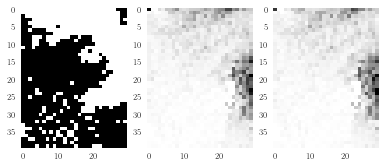

In [18]:
fig, axes = plt.subplots(ncols=3, nrows=1)
axes[0].imshow(calib_votes.T)
axes[1].imshow(calib_count.T)
axes[2].imshow(valid_count.T)
for ax in axes:
    ax.grid(False)

In [24]:
from scikitplot.metrics import plot_confusion_matrix

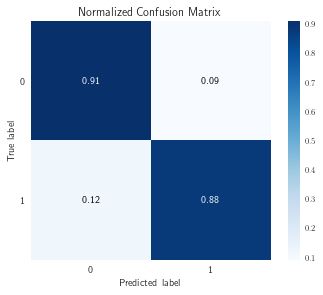

In [30]:
plot_confusion_matrix(cross['SHEAR_SAMPLE'], valid_val, normalize=True)
plt.show()